In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2

In [ ]:
img = io.imread("/content/drive/MyDrive/Gokarna diaries /20220416_154358.jpg", as_gray=True)

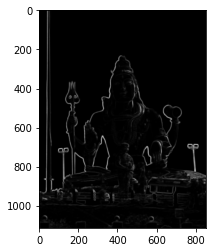

In [ ]:
from scipy import ndimage 
k=7
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

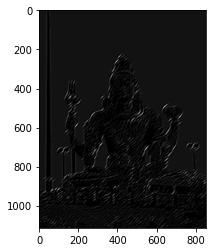

In [ ]:
ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

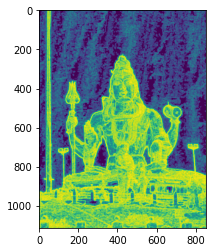

In [ ]:
#Entropy
#Entropy quantifies disorder.
#Since cell region has high variation in pixel values the entropy would be
#higher compared to scratch region
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

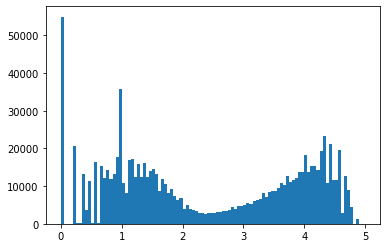

In [ ]:
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)

thresh = threshold_otsu(entropy_img)

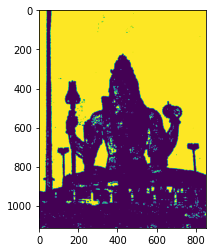

In [ ]:
binary = entropy_img <= thresh
plt.imshow(binary)

In [ ]:
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

Scratched area is:  506670 Square pixels


In [ ]:
scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

Scratched area in sq. microns is:  102600.675 Square pixels
